<a href="https://colab.research.google.com/github/gustavoep/reg_linear/blob/main/lin%2Bpolinom.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Procedimento para processamento de dados espectrais - SensorGreen

In [1]:
import pandas as pd
import os
import seaborn as sns
import scipy
import statsmodels
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from scipy.signal import savgol_filter
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
%matplotlib inline
print('Versão do pandas -> %s' % pd.__version__)
print('Versão do numpy -> %s' % np.__version__)
print('Versão do seaborn -> %s' % sns.__version__)
print('Versão do scipy -> %s' % scipy.__version__)
print('Versão do statsmodels -> %s' % statsmodels.__version__)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Versão do pandas -> 1.3.5
Versão do numpy -> 1.21.6
Versão do seaborn -> 0.11.2
Versão do scipy -> 1.4.1
Versão do statsmodels -> 0.10.2


In [2]:
#VERIFICAR DIRETORIO LOCAL
def current_path():
    print("Current working directory before")
    print(os.getcwd())
    print()
current_path()

Current working directory before
/content



In [3]:
#IMPORTAR DADOS
dados_excel = pd.read_excel("dadosteste.xlsx")
y = dados_excel.CO
x= dados_excel.iloc[:,46:]
print('Dados importados com sucesso!')

Dados importados com sucesso!


In [4]:
#REGRESSÃO LINEAR SIMPLES

#Dividindo os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25)
# Criando o modelo LinearRegression
regr = LinearRegression()
# Realizar treinamento do modelo
regr.fit(X_train, y_train)
# Realizar predição com os dados separados para teste
y_pred = regr.predict(X_test)
# Visualização dos 20 primeiros resultados
y_pred[:20]

array([ 0.89840762,  0.31403457,  0.81477146,  4.26537978,  5.15915363,
        6.83791418,  2.26185081, -0.48728415,  1.18454011, -1.12197755,
        3.81332392,  8.10613888,  0.61447842, -2.66934118, -1.53333465,
        5.84973238, -1.31608364, -0.72099681,  1.28101336,  3.86531237])

In [5]:
#AVALIAÇÃO ESTATÍSTICA DO MODELO
print('MAE: %.2f' % mean_absolute_error(y_test, y_pred))
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))
print('R2 Score: %.2f' % r2_score(y_test, y_pred))

MAE: 1.98
Mean squared error: 6.32
R2 Score: 0.09


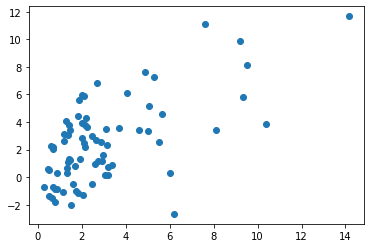

In [11]:
plt.plot(y_test,y_pred, 'o')
plt.show()

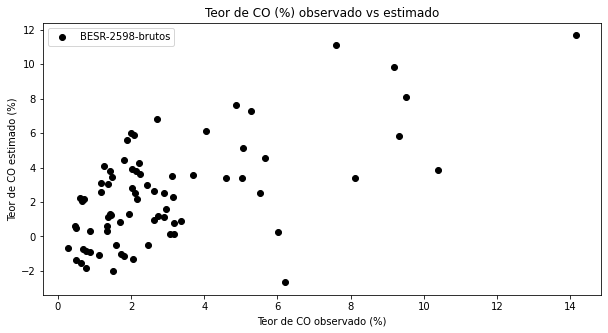

In [18]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
ax.set_title('Teor de CO (%) observado vs estimado')
ax.scatter(x=y_test,y=y_pred,label='BESR-2598-brutos', color='black')

ax.set_xlabel('Teor de CO observado (%)')
ax.set_ylabel('Teor de CO estimado (%)')
ax.legend(loc='best')
plt.show()

In [ ]:
#REGRESSÃO POLINOMIAL



In [7]:
import urllib.request
import json

with urllib.request.urlopen("https://geolocation-db.com/json/") as url:
    data = url.read().decode()
    print(data)

{"country_code":"US","country_name":"United States","city":null,"postal":null,"latitude":37.751,"longitude":-97.822,"IPv4":"34.91.23.151","state":null}
